# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
import json
import scipy.stats as st
from scipy.stats import linregress
import api_keys as api_keys
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [35]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [36]:
import pprint
pp = pprint.PrettyPrinter(indent=4)

c_id= []
name = []
country = []
long = []
latt = []
cloudiness= []
date= []
humidity= []
max_temp = []
wind_speed = []
weather_json = {}

try:
    url = "http://api.openweathermap.org/data/2.5/weather?"

    for city in cities:
        query_url = url + "&q=" + city + "&APPID=" + weather_api_key 
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        
        
        c_id.append(str(weather_json['id']))
        name.append(str(weather_json['name']))
        country.append(str(weather_json['sys']['country']))
        long.append(float(round(weather_json['coord']['lon'],2)))
        latt.append(float(round(weather_json['coord']['lat'],2)))
        cloudiness.append(float(weather_json['clouds']['all']))
        date.append(str(datetime.datetime.fromtimestamp(weather_json['dt']).strftime("%A, %d. %B %Y %I:%M%p")))
        humidity.append(float(weather_json['main']['humidity']))
        max_temp.append((1.8*(weather_json['main']['temp_max'] - 273) + 32))
        wind_speed.append(float(weather_json['wind']['speed']))
        
        
        

#         pp.pprint(weather_json)
except KeyError:
    
    pass

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [37]:
weather_list_df = pd.DataFrame({'City ID':c_id,'City':name,'Country':country,'Lng':long,'Lat':latt, 'Cloudiness':cloudiness, 'Date': date, 'Humidity': humidity, 'Max Temp':max_temp, 'Wind Speed':wind_speed})
weather_list_df.to_csv(output_data_file,index = False)
weather_list_df.head(5)

,City ID,City,Country,Lng,Lat,Cloudiness,Date,Humidity,Max Temp,Wind Speed
0,1507873,Chik,RU,82.43,54.99,0.0,"Monday, 01. March 2021 10:26PM",84.0,-1.930,3.00
1,3471896,Aquidauana,BR,-55.79,-20.47,0.0,"Monday, 01. March 2021 10:26PM",92.0,73.184,2.07
2,1282256,Hithadhoo,MV,73.08,-0.60,36.0,"Monday, 01. March 2021 10:26PM",70.0,82.472,4.50
3,4030556,Rikitea,PF,-134.97,-23.12,69.0,"Monday, 01. March 2021 10:26PM",63.0,79.034,2.45
4,5880054,Barrow,US,-156.79,71.29,75.0,"Monday, 01. March 2021 10:26PM",69.0,-21.730,5.66


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

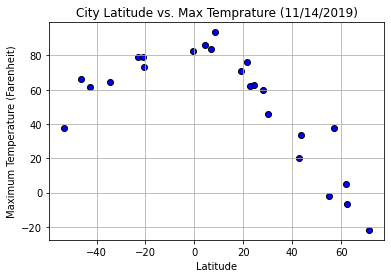

In [38]:
plt.scatter(weather_list_df['Lat'], weather_list_df['Max Temp'], marker="o", facecolors="blue", edgecolors="black")

# Set the upper and lower limits of our y axis
# plt.ylim(0,120)

# Set the upper and lower limits of our x axis
# plt.xlim(-60,180)

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Max Temprature (11/14/2019)")
plt.ylabel("Maximum Temperature (Farenheit)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig('../output_data/Lat_MT.png')

## Latitude vs. Humidity Plot

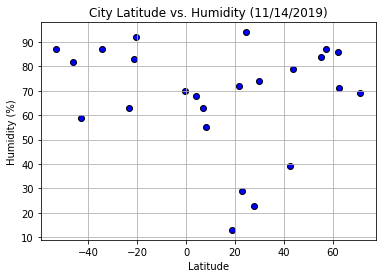

In [39]:
plt.scatter(weather_list_df['Lat'], weather_list_df['Humidity'], marker="o", facecolors="blue", edgecolors="black")

# Set the upper and lower limits of our y axis
# plt.ylim(0,300)

# Set the upper and lower limits of our x axis
# plt.xlim(-60,180)

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Humidity (11/14/2019)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig('../output_data/Lat_Hum.png')

## Latitude vs. Cloudiness Plot

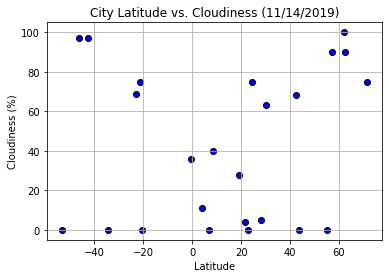

In [40]:

plt.scatter(weather_list_df['Lat'], weather_list_df['Cloudiness'], marker="o", facecolors="blue", edgecolors="black")

# Set the upper and lower limits of our y axis
# plt.ylim(0,100)

# Set the upper and lower limits of our x axis
# plt.xlim(-60,180)

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Cloudiness (11/14/2019)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig('../output_data/Lat_Cl.png')

## Latitude vs. Wind Speed Plot

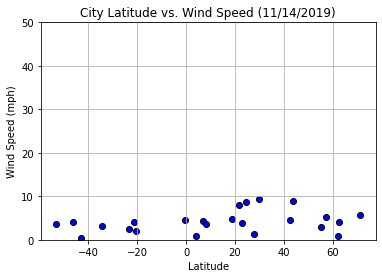

In [41]:
plt.scatter(weather_list_df['Lat'], weather_list_df['Wind Speed'], marker="o", facecolors="blue", edgecolors="black")

# Set the upper and lower limits of our y axis
plt.ylim(0,50)

# Set the upper and lower limits of our x axis
# plt.xlim(-60,180)

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Wind Speed (11/14/2019)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig('../output_data/Lat_W.png')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8529213039572462


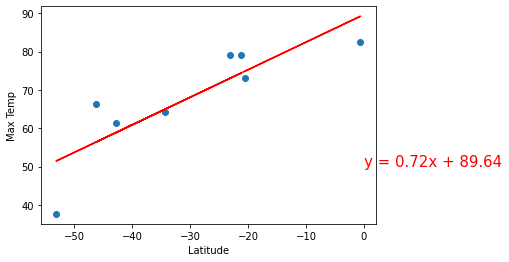

<Figure size 432x288 with 0 Axes>

In [42]:
northern_x_v = weather_list_df[weather_list_df['Lat']<1]
southern_x_v = weather_list_df[weather_list_df['Lat']>1]

x_values=northern_x_v['Lat']

y_values = northern_x_v['Max Temp']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('../output_data/N_linear_Lat_MT.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.9584183147358714


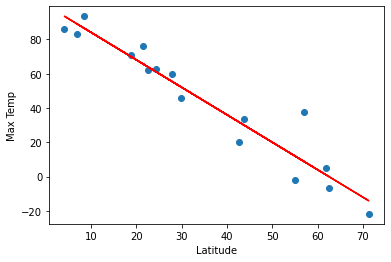

<Figure size 432x288 with 0 Axes>

In [43]:
x_values =southern_x_v['Lat']

y_values = southern_x_v['Max Temp']
# plt.scatter(x_values,y_values)
# plt.xlabel('Rooms in House')
# plt.ylabel('Median House Prices ($1000)')
# plt.show()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('../output_data/S_linear_Lat_MT.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.1573338949286827


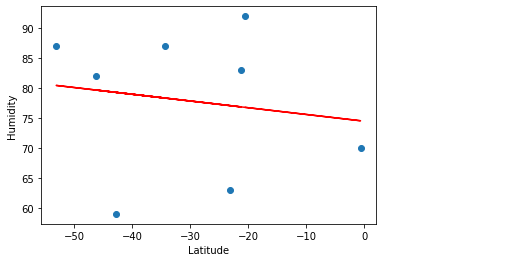

<Figure size 432x288 with 0 Axes>

In [44]:
x_values =northern_x_v['Lat']

y_values = northern_x_v['Humidity']
# plt.scatter(x_values,y_values)
# plt.xlabel('Rooms in House')
# plt.ylabel('Median House Prices ($1000)')
# plt.show()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('../output_data/N_linear_Lat_Hum.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.37912993981414483


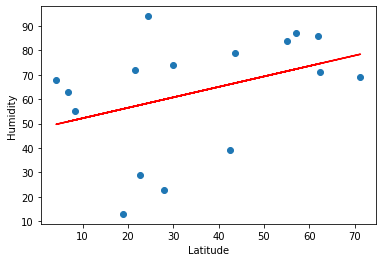

<Figure size 432x288 with 0 Axes>

In [45]:
x_values =southern_x_v['Lat']

y_values = southern_x_v['Humidity']
# plt.scatter(x_values,y_values)
# plt.xlabel('Rooms in House')
# plt.ylabel('Median House Prices ($1000)')
# plt.show()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('../output_data/S_linear_Lat_Hum.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.10171684717943309


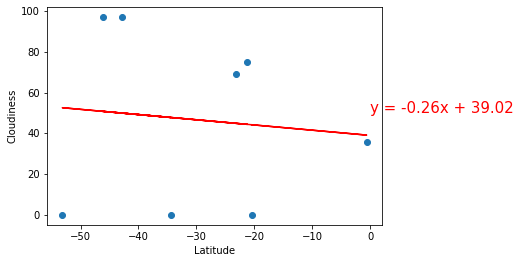

<Figure size 432x288 with 0 Axes>

In [46]:
x_values =northern_x_v['Lat']

y_values = northern_x_v['Cloudiness']
# plt.scatter(x_values,y_values)
# plt.xlabel('Rooms in House')
# plt.ylabel('Median House Prices ($1000)')
# plt.show()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('../output_data/N_linear_Lat_Cl.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.5890338410152005


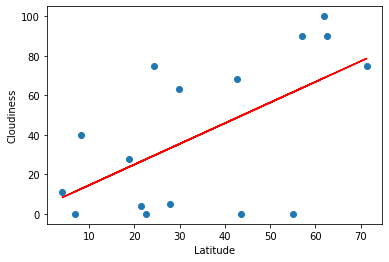

<Figure size 432x288 with 0 Axes>

In [47]:
x_values =southern_x_v['Lat']

y_values = southern_x_v['Cloudiness']
# plt.scatter(x_values,y_values)
# plt.xlabel('Rooms in House')
# plt.ylabel('Median House Prices ($1000)')
# plt.show()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('../output_data/S_linear_Lat_Cl.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.2671281861177742


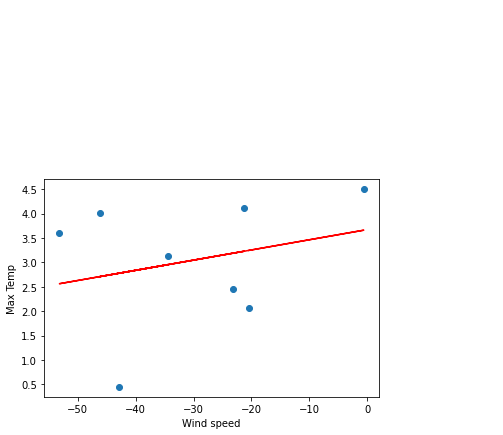

<Figure size 432x288 with 0 Axes>

In [48]:

x_values = northern_x_v['Lat']

y_values = northern_x_v['Wind Speed']
# plt.scatter(x_values,y_values)
# plt.xlabel('Rooms in House')
# plt.ylabel('Median House Prices ($1000)')
# plt.show()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,8),fontsize=15,color="red")
plt.xlabel('Wind speed')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('../output_data/N_linear_Lat_W.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.005610979056266629


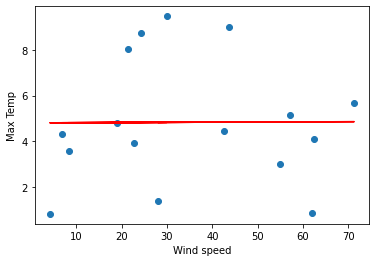

<Figure size 432x288 with 0 Axes>

In [49]:
x_values = southern_x_v['Lat']

y_values = southern_x_v['Wind Speed']
# plt.scatter(x_values,y_values)
# plt.xlabel('Rooms in House')
# plt.ylabel('Median House Prices ($1000)')
# plt.show()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,5),fontsize=15,color="red")
plt.xlabel('Wind speed')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('../output_data/S_linear_Lat_W.png')